In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

train_df = pd.read_csv('../../data/train.csv')
structure_df = pd.read_csv('../../data/structures.csv')

valence_info = pd.read_pickle('../../pkl/valence_info.pkl')
xyz_info = pd.read_pickle('../../pkl/xyz_info.pkl')
name_info = pd.read_pickle('../../pkl/name_info.pkl')
number_info = pd.read_pickle('../../pkl/number_info.pkl')
distance_info = pd.read_pickle('../../pkl/distance_info.pkl')
atom_valence = pd.read_pickle('../../pkl/atom_valence.pkl')

atom_name = structure_df['atom'].unique()
molecule_name = structure_df['molecule_name'].unique()

structure_df = pd.concat([structure_df, pd.DataFrame(atom_valence, columns=['atom_valence'])], axis=1)

In [2]:

# atom_list = ['H','F','O','N','C']

# def edge(TEST_ID):
#     edge_num = 0
#     for key,value in number_info[molecule_name[TEST_ID]].items():
#         edge_num += valence_info[key] * value

#     a = 0
#     distance_select = dict()

#     while edge_num > 0:
#         if a > 4:
#             break
#         atom_arr = structure_df[structure_df['molecule_name']==molecule_name[TEST_ID]]['atom'].values
#         idx = np.where(atom_arr == atom_list[a])[0]
#         for i in idx:
#             for key,value in sorted(distance_info[molecule_name[TEST_ID]].items(), key=lambda x:x[1]):
#                 if str(i) in key:
#                     atom_idx_2 = key.split('-')
#                     atom_idx_1 = [ai for ai in atom_idx_2 if ai != str(i)]
#                     atom_idx = atom_idx_1[0]
#                     if name_info[molecule_name[TEST_ID]][int(atom_idx)] != ('H' or 'F'):
#                         distance_select[key] = value
#                         edge_num -= 2
#         a += 1
#     return distance_select

In [47]:
# def edge(TEST_ID, distance_info):
#     a = 0
#     error_count = 0
#     atom_list = ['H','F','O','N','C']
#     edge_num_info = dict()
#     edge_dict = dict()
#     sub_distance_info = distance_info

#     for key,value in name_info[molecule_name[TEST_ID]].items():
#         edge_num_info[key] = valence_info[value]
        
# #     while np.sum(list(edge_num_info.values())) != 0:
#     while True:
#         rm_key_list = list()
#         if a == 5:
#             a = 0
#             error_count += 1
#         atom_arr = structure_df[structure_df['molecule_name']==molecule_name[TEST_ID]]['atom'].values
#         idx = np.where(atom_arr == atom_list[a])[0]
#         for i in idx:
#             if edge_num_info[i] > 0:
#                 for key,value in sorted(sub_distance_info[molecule_name[TEST_ID]].items(), key=lambda x:x[1]):
#                     judge = key.split('-')
#                     if (str(i) == judge[0]) or (str(i) == judge[1]):
#                         atom_idx = key.split('-')
#                         atom_idx_1 = [ai for ai in atom_idx if ai != str(i)]
#                         atom_idx_1 = int(atom_idx_1[0]) # opponent
#                         atom_idx_2 = i
#                         if edge_num_info[atom_idx_1] > 0 and key not in edge_dict:
#                             if name_info[molecule_name[TEST_ID]][atom_idx_1] != 'H' and name_info[molecule_name[TEST_ID]][atom_idx_1] != 'F':
#                                 edge_dict[key] = value
#                                 edge_num_info[atom_idx_1] -= 1
#                                 edge_num_info[atom_idx_2] -= 1
#                                 break
#                         else:
#                             rm_key_list.append(key)
#                             break
        
#         if len(rm_key_list) > 0:
#             for r in rm_key_list:
#                 del sub_distance_info[molecule_name[TEST_ID]][r]
        
#         if link_edge(edge_dict,i) == 0:
#             break
        
# #         if error_count > 15:
# #             count = 0
# #             for eni in edge_num_info.values():
# #                 if eni > 0:
# #                     count += 1
# #             if count == 1:
# #                 print('Error:',TEST_ID)
# #                 return distance_select, TEST_ID
        
#         a += 1
#     return edge_dict, 0

In [ ]:
def edge(TEST_ID, distance_info):
    a = 0
    error_count = 0
    atom_list = ['H','F','O','N','C']
    edge_num_info = dict()
    edge_dict = dict()
    sub_distance_info = distance_info

    for key,value in name_info[molecule_name[TEST_ID]].items():
        edge_num_info[key] = valence_info[value]
        
#     while np.sum(list(edge_num_info.values())) != 0:
    while True:
        rm_key_list = list()
        if a == 5:
            a = 0
            error_count += 1
        atom_arr = structure_df[structure_df['molecule_name']==molecule_name[TEST_ID]]['atom'].values
        idx = np.where(atom_arr == atom_list[a])[0]
        for i in idx:
            if edge_num_info[i] > 0:
                for key,value in sorted(sub_distance_info[molecule_name[TEST_ID]].items(), key=lambda x:x[1]):
                    judge = key.split('-')
                    if (str(i) == judge[0]) or (str(i) == judge[1]):
                        atom_idx = key.split('-')
                        atom_idx_1 = [ai for ai in atom_idx if ai != str(i)]
                        atom_idx_1 = int(atom_idx_1[0]) # opponent
                        atom_idx_2 = i
                        if edge_num_info[atom_idx_1] > 0:
                            if key not in edge_dict:
                                if name_info[molecule_name[TEST_ID]][atom_idx_1] != 'H' and name_info[molecule_name[TEST_ID]][atom_idx_1] != 'F':
                                    edge_dict[key] = value
                                    edge_num_info[atom_idx_1] -= 1
                                    edge_num_info[atom_idx_2] -= 1
                                    break
                        else:
                            rm_key_list.append(key)
                            break
        
        if len(rm_key_list) > 0:
            for r in rm_key_list:
                del sub_distance_info[molecule_name[TEST_ID]][r]
        
        if link_edge(edge_dict,i) == 0:
            break

        
        a += 1
    return edge_dict, 0

In [48]:
distance_info = pd.read_pickle('../../pkl/distance_info.pkl')
I = 10
print(edge(I, distance_info))
# structure_df[structure_df['molecule_name']==molecule_name[I]]

({'0-3': 1.0075111, '0-4': 1.0049334, '1-5': 1.1092954, '1-2': 1.2092199}, 0)


In [49]:
structure_df[structure_df['molecule_name']==molecule_name[I]]

molecule_name  atom_index atom         x         y         z  \
53  dsgdb9nsd_000012           0    N -0.025900  1.346146  0.008894   
54  dsgdb9nsd_000012           1    C  0.046467 -0.011743  0.001204   
55  dsgdb9nsd_000012           2    O  1.071835 -0.652588 -0.011133   
56  dsgdb9nsd_000012           3    H  0.825355  1.885049  0.003738   
57  dsgdb9nsd_000012           4    H -0.908377  1.826796  0.018920   
58  dsgdb9nsd_000012           5    H -0.961441 -0.475004  0.008074   

    atom_valence  
53             3  
54             4  
55             2  
56             1  
57             1  
58             1

In [25]:
distance_info = pd.read_pickle('../../pkl/distance_info.pkl')
for i in range(20):
    t = edge(i, distance_info)
    print(i,t)

0 {'0-1': 1.0919529, '0-2': 1.0919516, '0-3': 1.0919464, '0-4': 1.0919476}
1 {'0-1': 1.01719, '0-2': 1.0171872, '0-3': 1.0172079}
2 {'0-1': 0.9621069, '0-2': 0.96210676}
3 {'1-2': 1.0620991, '0-3': 1.0620991, '0-1': 1.199079}
4 {'0-2': 1.066598, '0-1': 1.151748}
5 {'0-2': 1.0949537, '0-3': 1.0949582, '0-4': 1.0949683, '1-5': 1.0949582, '1-6': 1.0949534, '1-7': 1.0949677, '0-1': 1.5296286}
6 {'0-2': 1.1003416, '0-3': 1.1003337, '0-4': 1.0934025, '1-5': 0.96130794, '0-1': 1.4157523}
7 {'0-3': 1.0952631, '0-4': 1.0952656, '0-5': 1.0952556, '2-6': 1.0614507, '1-2': 1.2014405, '0-1': 1.4550089}
8 {'0-3': 1.0933173, '0-4': 1.0933192, '0-5': 1.0933058, '1-2': 1.1550086, '0-1': 1.4569297}
9 {'0-3': 1.0911026, '0-4': 1.096696, '0-5': 1.0967913, '1-6': 1.1150556, '1-2': 1.2036278, '0-1': 1.5076236}
10 {'0-3': 1.0075111, '0-4': 1.0049334, '1-5': 1.1092954, '1-2': 1.2092199, '0-1': 1.3598378}
11 {'0-3': 1.0959457, '0-4': 1.0959485, '0-5': 1.0946596, '1-6': 1.0972661, '1-7': 1.097266, '2-8': 1.0959

In [31]:
def print_3Dstructure(distance_select, i, figsize=(9, 9), scale=5, plot=True, save=True):
    atom_color = {'C':'c', 'H':'r', 'N':'b', 'O':'y', 'F':'m'}
    # 全て plot されても邪魔なので
    if plot:
        %matplotlib inline
    else:
        # 最後の図だけは表示されてしまう
        %matplotlib agg
        
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')
    
#     for atom_name, named_structure in structure.items():
#         atom = named_structure.atom
#         x, y, z = named_structure.pos
        
#         for i, e in enumerate(edges[name2id[atom_name]]):
#             if e >= 1:
#                 nx, ny, nz = structure[id2name[i]].pos
#                 plt.plot([x, nx], [y, ny], [z, nz], color='black', alpha=e*0.3)
    for key, value in xyz_info[molecule_name[i]].items():
        x = value['x']
        y = value['y']
        z = value['z']
        ax.scatter(x, y, z, color=atom_color[name_info[molecule_name[i]][key]], s=50)
    for key, value in distance_select.items():
        s = int(key.split('-')[0])
        e = int(key.split('-')[1])
        xs = xyz_info[molecule_name[i]][s]['x']
        ys = xyz_info[molecule_name[i]][s]['y']
        zs = xyz_info[molecule_name[i]][s]['z']
        xe = xyz_info[molecule_name[i]][e]['x']
        ye = xyz_info[molecule_name[i]][e]['y']
        ze = xyz_info[molecule_name[i]][e]['z']
        
        plt.plot([xs,xe],[ys,ye],[zs,ze], color='black', alpha=0.3)
#     ax.scatter(x, y, z, s=50)
    
#     ax.set_xlim(-scale, scale)
#     ax.set_ylim(-scale, scale)
#     ax.set_zlim(-scale, scale)
#     handles=[ax.scatter([], [], [], color=c, s=50) for c in atom_color.values()]
#     ax.legend(handles=handles, labels=atom_color.keys())
    
#     if save:
#         plt.savefig(os.path.join(save_folder, filename))
    
    
    if plot:
        plt.show()

In [36]:
def link_edge(edge_dict,i):
    edge_set = set()
    for n in range(len(edge_dict)):
        for idx, key in enumerate(edge_dict.keys()):
            if idx == 0 and n == 0:
                atom_idx_1 = int(key.split('-')[0])
                atom_idx_2 = int(key.split('-')[1])
                edge_set.add(atom_idx_1)
                edge_set.add(atom_idx_2)
            else:
                sub_set = set()
                atom_idx_1 = int(key.split('-')[0])
                atom_idx_2 = int(key.split('-')[1])
                sub_set.add(atom_idx_1)
                sub_set.add(atom_idx_2)
                if sub_set.issubset(edge_set):
                    skip = 0
                elif len(edge_set.intersection(sub_set)) > 0:
                    edge_set = edge_set.union(sub_set)
    
    if np.sum(list(number_info[molecule_name[i]].values()))==len(edge_set):
#         print("{0:>3}:all vertex are reachable".format(i))
        return 0
    else:
#         print("{0:>3}:can't reachable".format(i))
        return i

In [40]:
distance_info = pd.read_pickle('../../pkl/distance_info.pkl')
error_list = list()
for i in range(100):
    edge_dict, error = edge(i, distance_info)
    if error != 0:
        error_list.append(-error)
    error = link_edge(edge_dict,i)
    if error != 0:
        error_list.append(error)
pd.to_pickle(error_list, '../../pkl/error_list.pkl')

  0:all vertex are reachable
  1:all vertex are reachable
  2:all vertex are reachable
  3:all vertex are reachable
  4:all vertex are reachable
  5:all vertex are reachable
  6:all vertex are reachable
  7:all vertex are reachable
  8:all vertex are reachable
  9:all vertex are reachable
 10:all vertex are reachable
 11:all vertex are reachable
 12:all vertex are reachable
 13:all vertex are reachable
 14:all vertex are reachable
Error: 15
 15:can't reachable
 16:all vertex are reachable
 17:all vertex are reachable
 18:all vertex are reachable
 19:all vertex are reachable
 20:all vertex are reachable
 21:all vertex are reachable
 22:all vertex are reachable
 23:all vertex are reachable
 24:all vertex are reachable
 25:all vertex are reachable
 26:can't reachable
 27:all vertex are reachable
 28:all vertex are reachable
 29:all vertex are reachable
 30:all vertex are reachable
 31:all vertex are reachable
 32:all vertex are reachable
 33:all vertex are reachable
 34:all vertex are rea

0 {'0-1': 1.0919529, '0-2': 1.0919516, '0-3': 1.0919464, '0-4': 1.0919476}


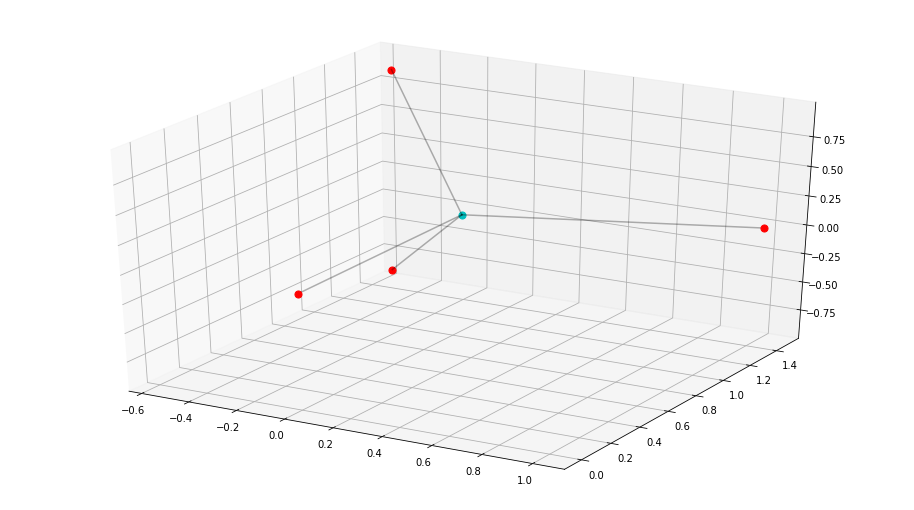

1 {'0-1': 1.01719, '0-2': 1.0171872, '0-3': 1.0172079}


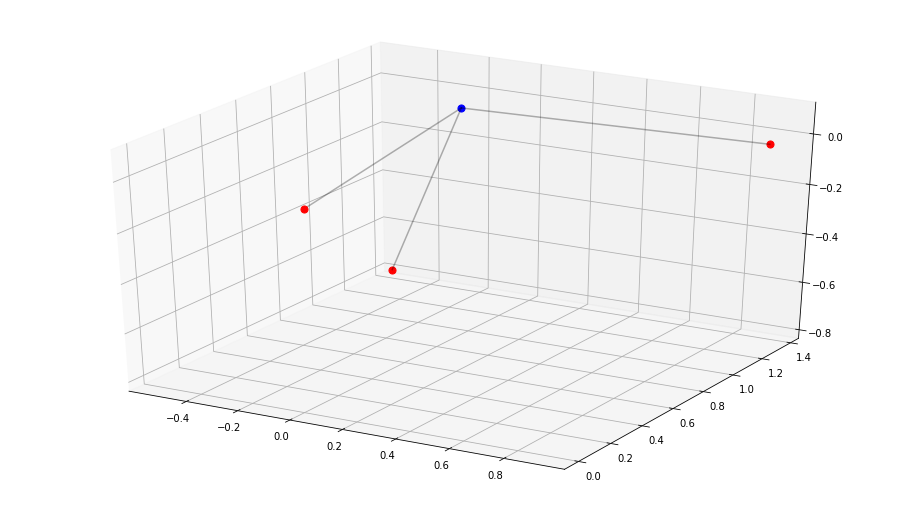

2 {'0-1': 0.9621069, '0-2': 0.96210676}


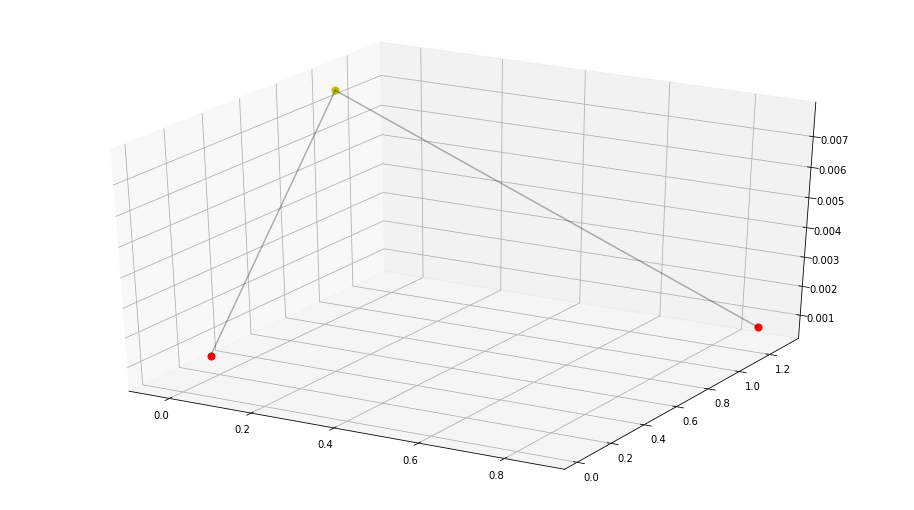

3 {'1-2': 1.0620991, '0-3': 1.0620991, '0-1': 1.199079}


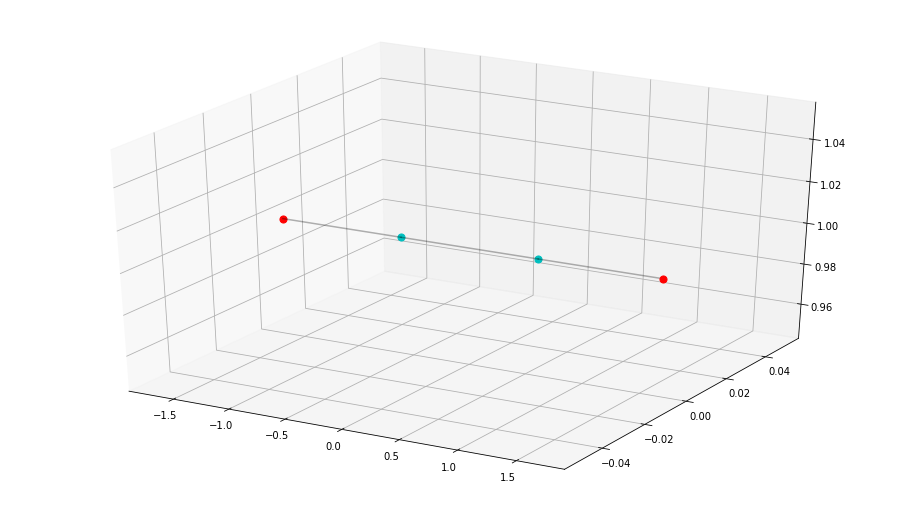

4 {'0-2': 1.066598, '0-1': 1.151748}


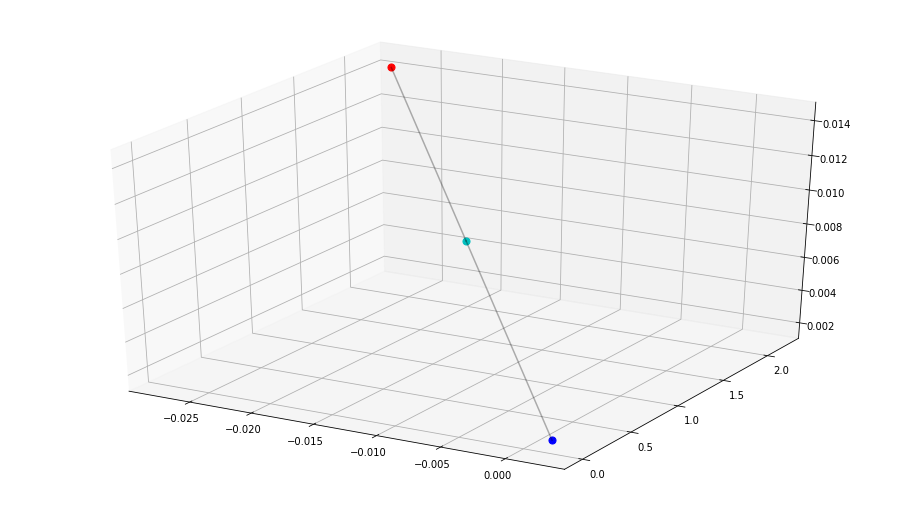

5 {'0-2': 1.0949537, '0-3': 1.0949582, '0-4': 1.0949683, '1-5': 1.0949582, '1-6': 1.0949534, '1-7': 1.0949677, '0-1': 1.5296286}


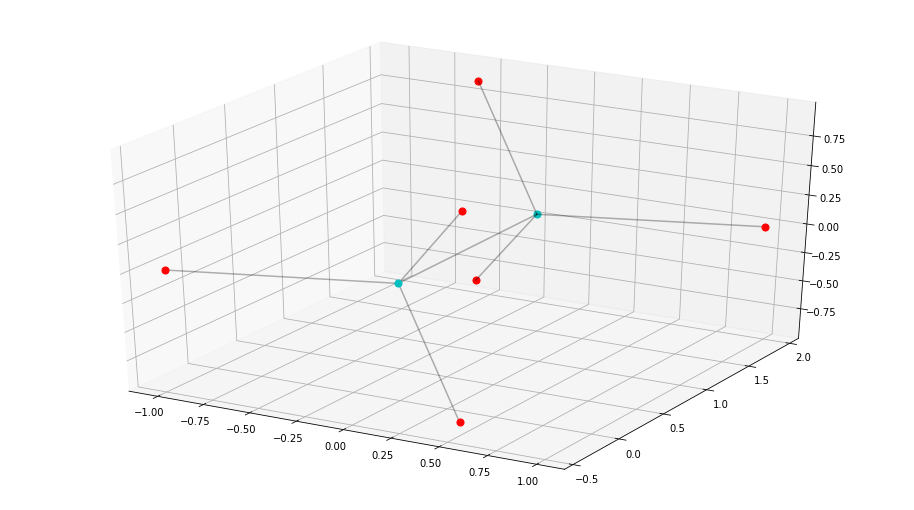

6 {'0-2': 1.1003416, '0-3': 1.1003337, '0-4': 1.0934025, '1-5': 0.96130794, '0-1': 1.4157523}


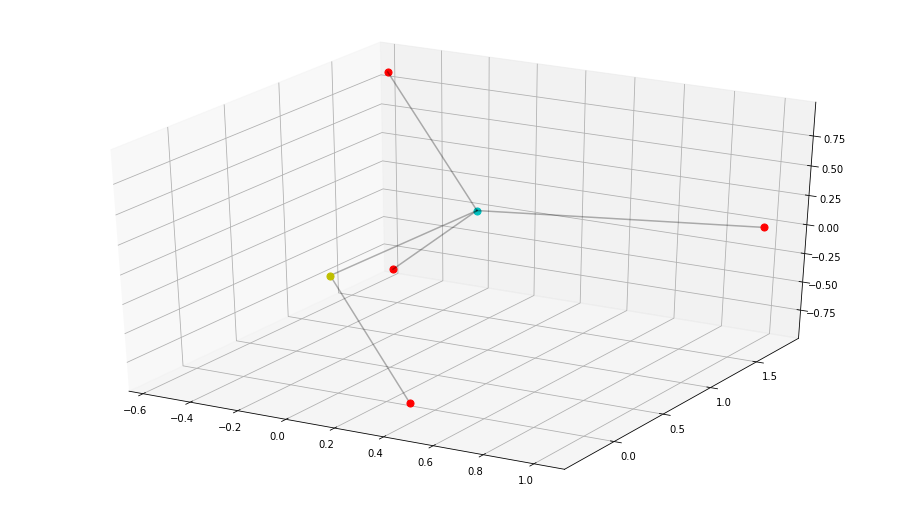

7 {'0-3': 1.0952631, '0-4': 1.0952656, '0-5': 1.0952556, '2-6': 1.0614507, '1-2': 1.2014405, '0-1': 1.4550089}


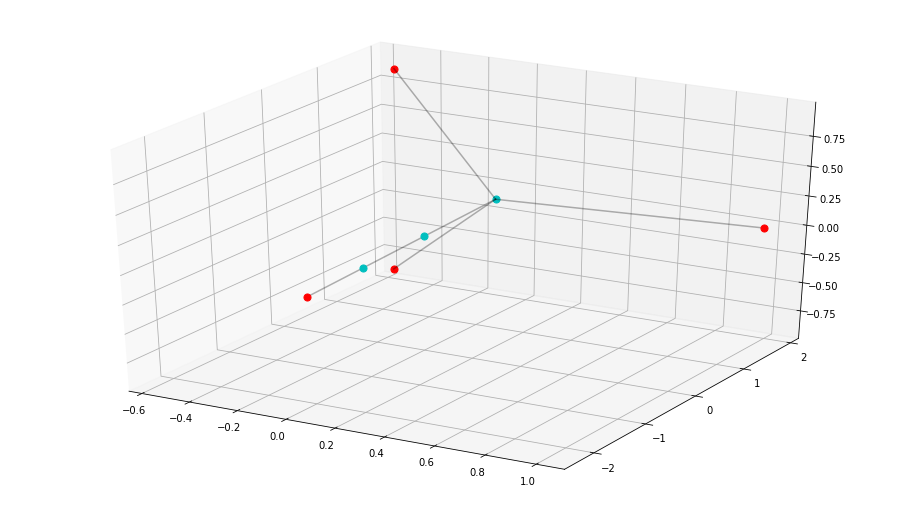

8 {'0-3': 1.0933173, '0-4': 1.0933192, '0-5': 1.0933058, '1-2': 1.1550086, '0-1': 1.4569297}


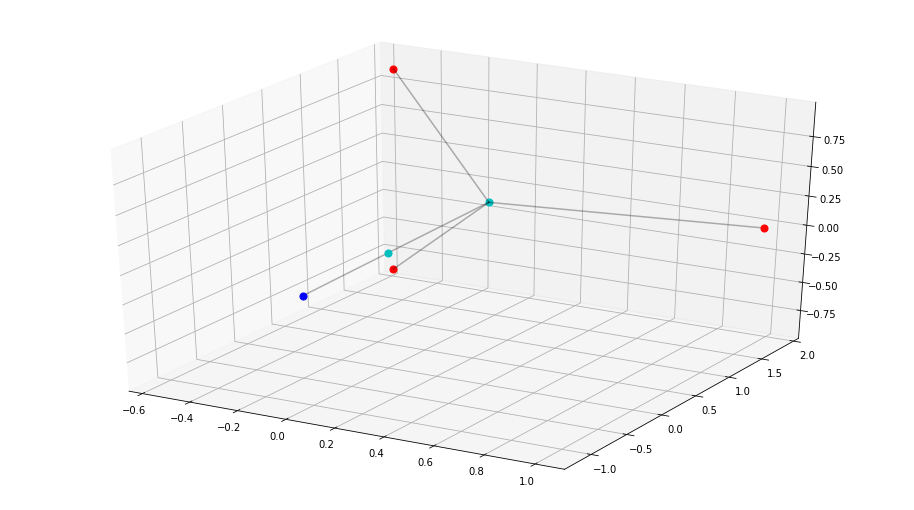

9 {'0-3': 1.0911026, '0-4': 1.096696, '0-5': 1.0967913, '1-6': 1.1150556, '1-2': 1.2036278, '0-1': 1.5076236}


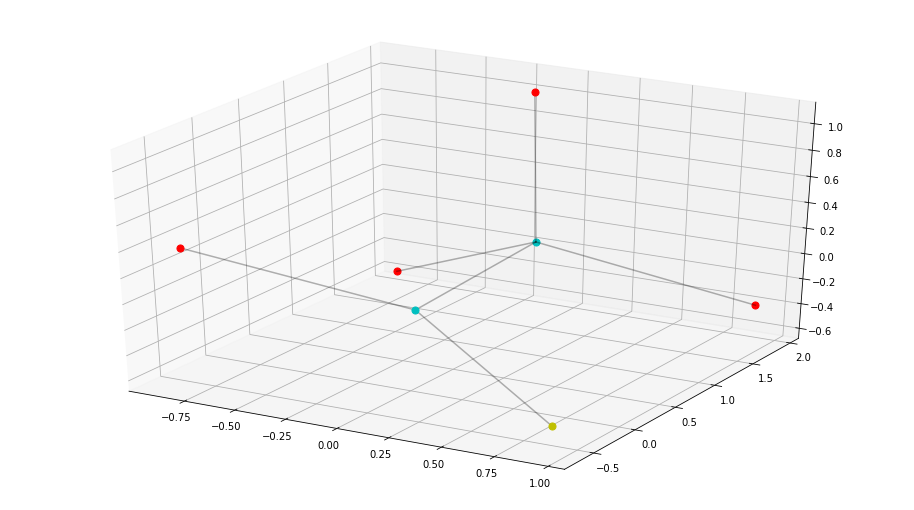

10 {'0-3': 1.0075111, '0-4': 1.0049334, '1-5': 1.1092954, '1-2': 1.2092199, '0-1': 1.3598378}


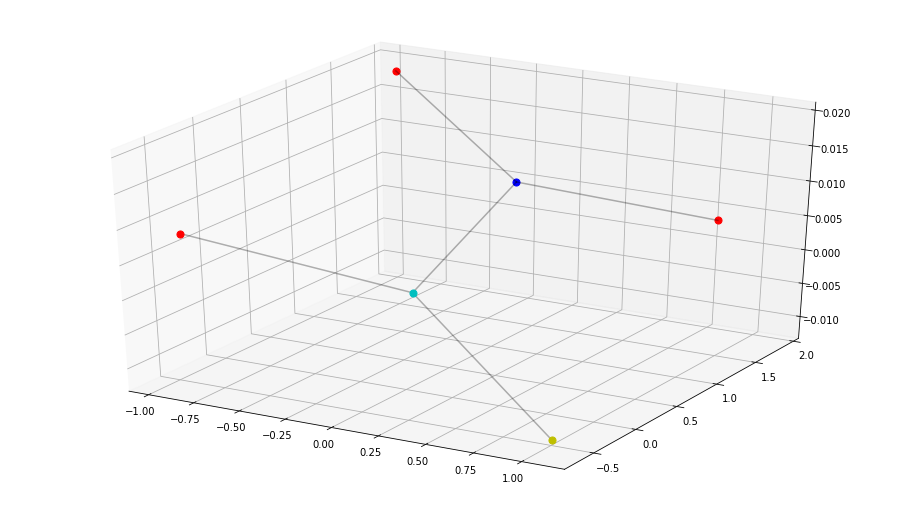

11 {'0-3': 1.0959457, '0-4': 1.0959485, '0-5': 1.0946596, '1-6': 1.0972661, '1-7': 1.097266, '2-8': 1.0959485, '2-9': 1.0946597, '2-10': 1.0959458, '1-2': 1.5312568, '0-1': 1.531257}


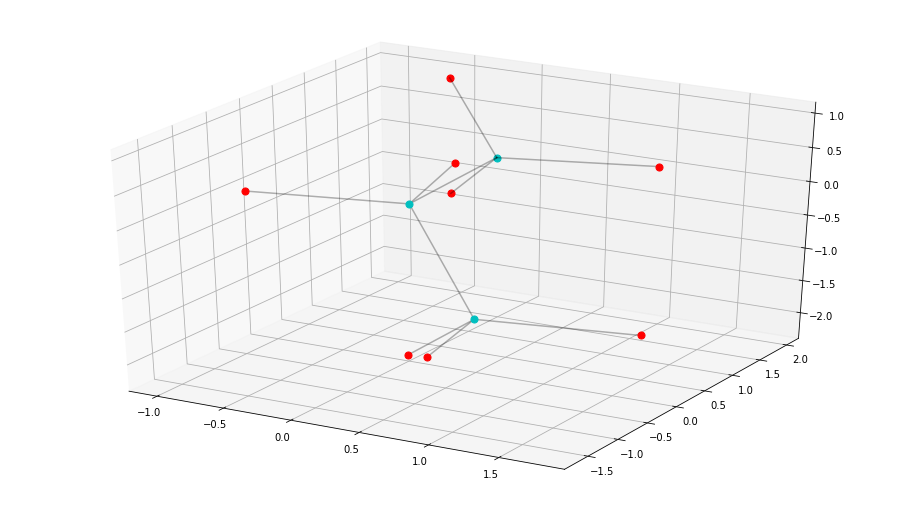

12 {'0-3': 1.0938605, '0-4': 1.0938586, '0-5': 1.094182, '1-6': 1.1020701, '1-7': 1.1020677, '2-8': 0.96152186, '1-2': 1.4206997, '0-1': 1.5198294}


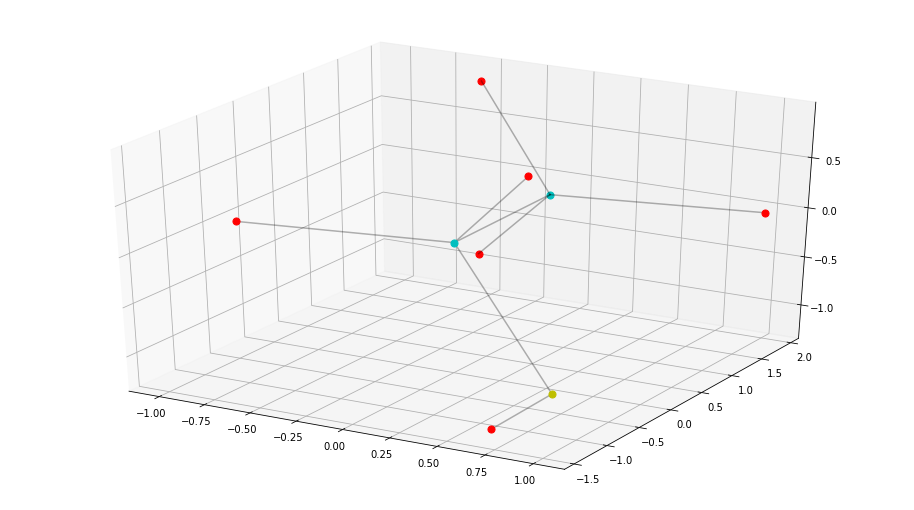

13 {'0-3': 1.1023278, '0-4': 1.1023272, '0-5': 1.0928518, '2-6': 1.1023272, '2-7': 1.1023276, '2-8': 1.0928518, '0-1': 1.4060835, '1-2': 1.4060835}


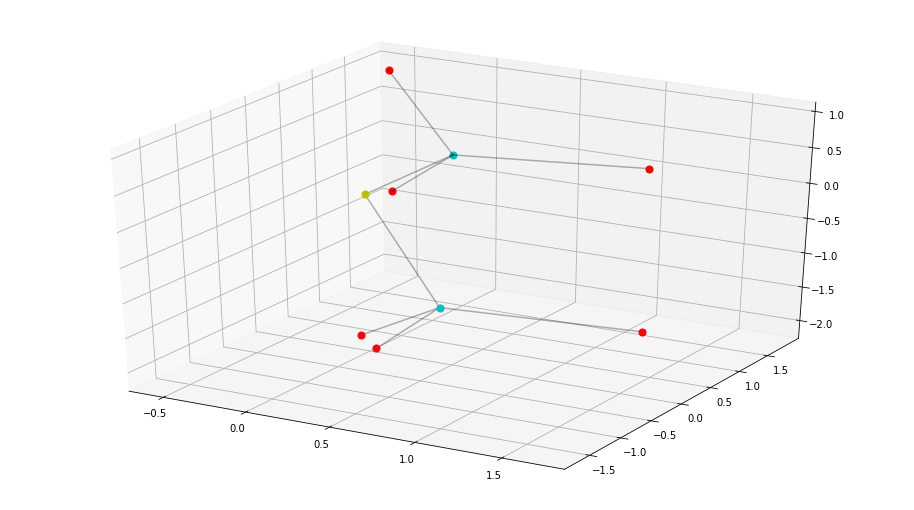

14 {'0-3': 1.0844728, '0-4': 1.084473, '1-5': 1.0844672, '1-6': 1.0844672, '2-7': 1.0844711, '2-8': 1.084471, '0-1': 1.5067209, '1-2': 1.5066757, '0-2': 1.5068253}


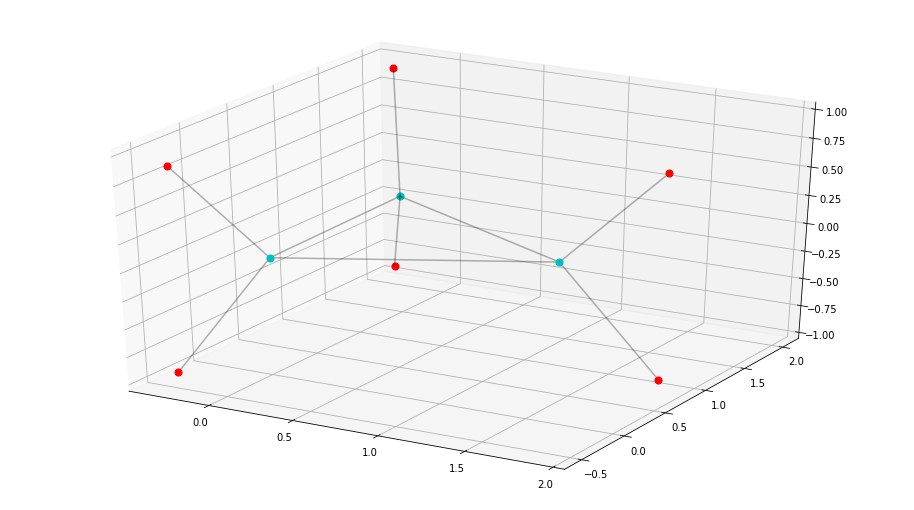

Error: 15
15 {'0-3': 1.0890882, '0-4': 1.0890876, '1-5': 1.0890874, '1-6': 1.0890881, '0-2': 1.4254593}


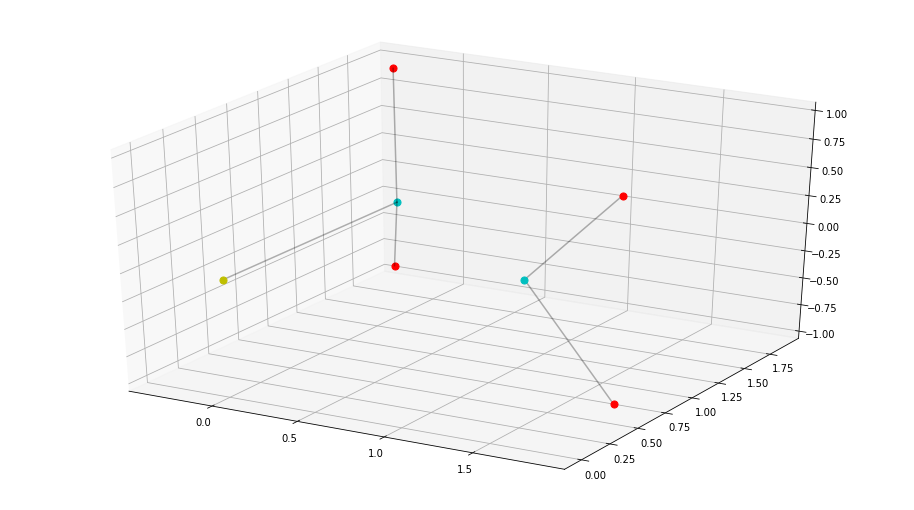

16 {'0-4': 1.0959986, '0-5': 1.0904583, '0-6': 1.0960078, '2-7': 1.0960003, '2-8': 1.0904577, '2-9': 1.0960065, '1-3': 1.2086626, '1-2': 1.5199524, '0-1': 1.5199546}


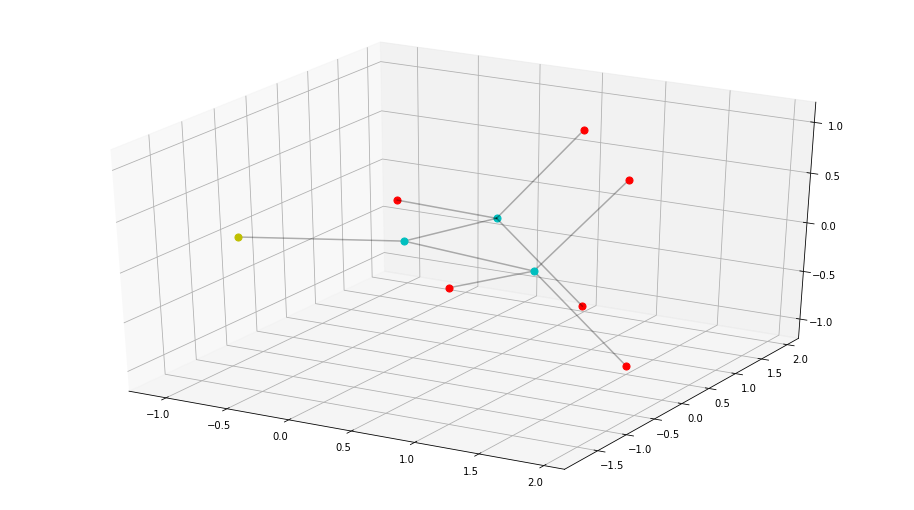

17 {'0-4': 1.0940087, '0-5': 1.0896562, '0-6': 1.0955893, '2-7': 1.004771, '2-8': 1.0069517, '1-3': 1.2139609, '1-2': 1.369356, '0-1': 1.5226022}


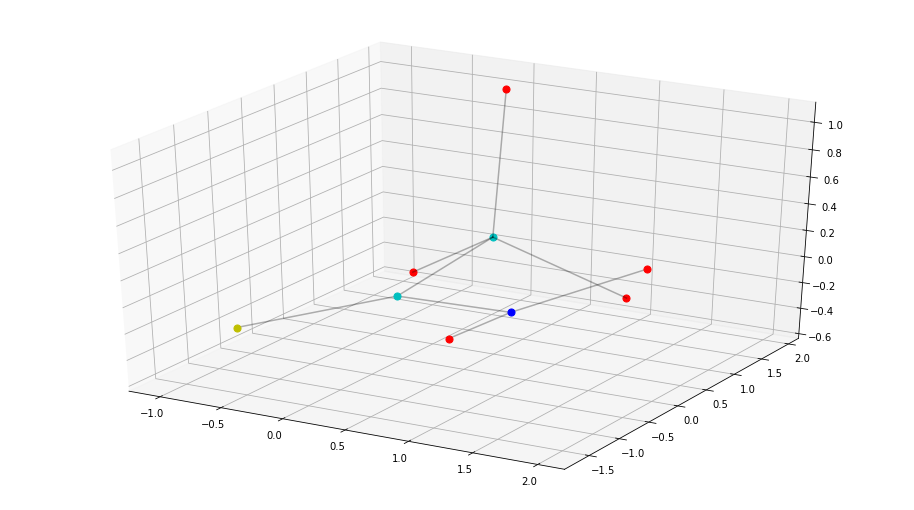

18 {'0-4': 1.0090362, '0-5': 1.0087088, '2-6': 1.0090388, '2-7': 1.0087107, '1-3': 1.2132956, '0-1': 1.3886766, '1-2': 1.3886844}


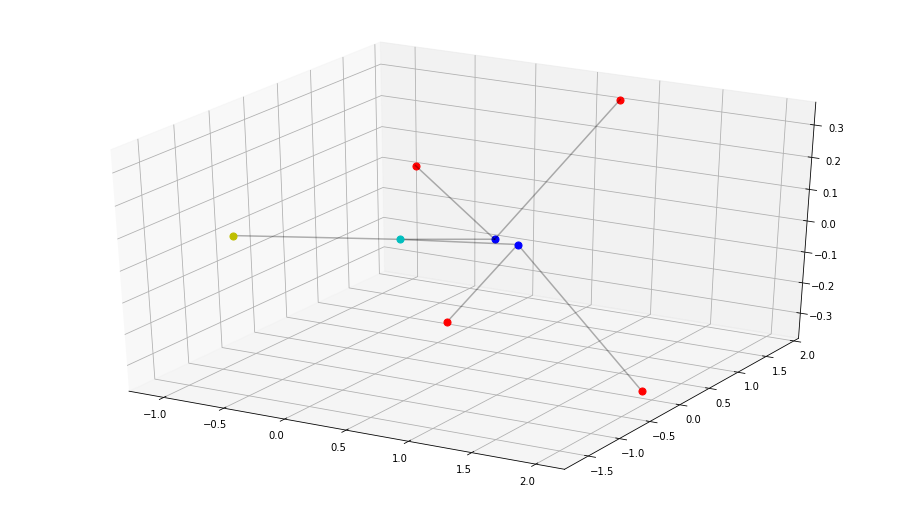

19 {'0-4': 1.0968819, '0-5': 1.0952251, '0-6': 1.0952086, '1-7': 1.0993454, '2-8': 1.096912, '2-9': 1.0952337, '2-10': 1.0952467, '3-11': 1.0952708, '3-12': 1.0952262, '3-13': 1.0968941, '1-2': 1.5341613, '0-1': 1.5342027, '1-3': 1.5342418}


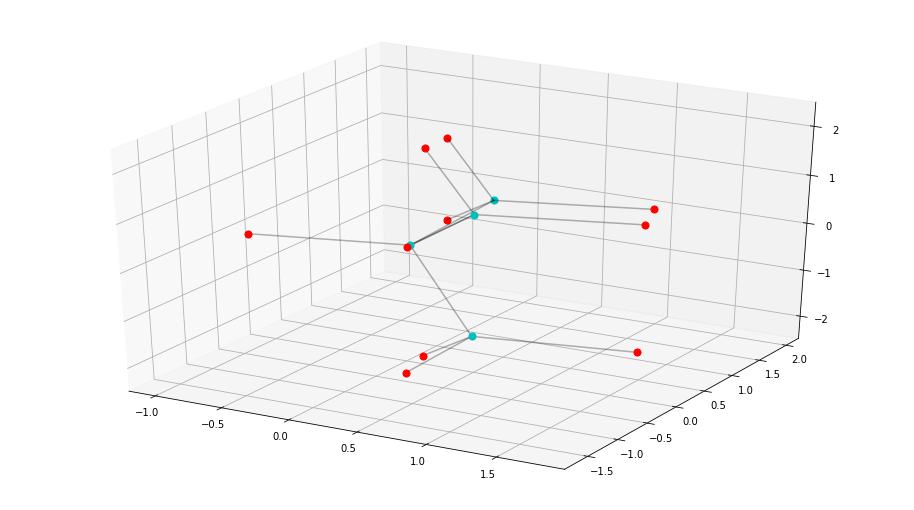

20 {'0-4': 1.0950673, '0-5': 1.0965462, '0-6': 1.0948768, '1-7': 1.1035545, '2-8': 1.0948516, '2-9': 1.0932624, '2-10': 1.093997, '3-11': 0.9623483, '1-3': 1.4260432, '1-2': 1.523941, '0-1': 1.5295403}


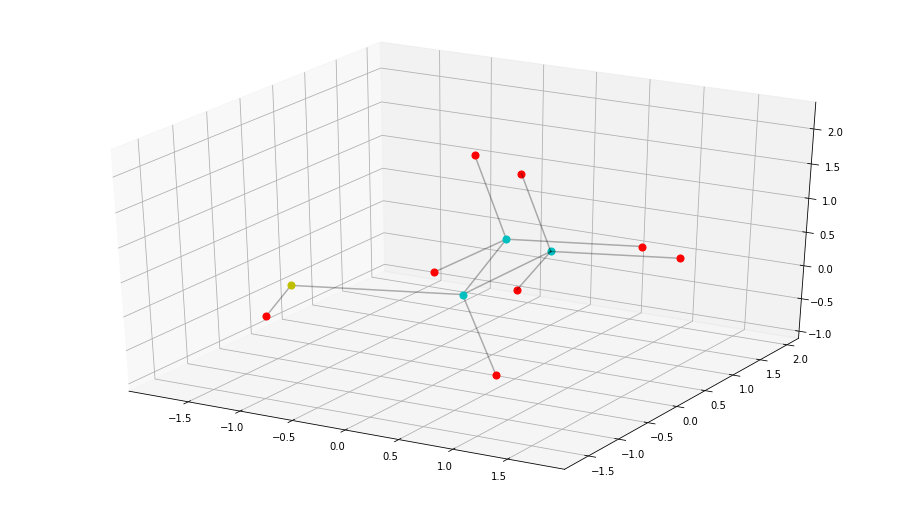

21 {'2-4': 1.061934, '3-5': 1.061934, '0-3': 1.2066858, '1-2': 1.2066858, '0-1': 1.3619604}


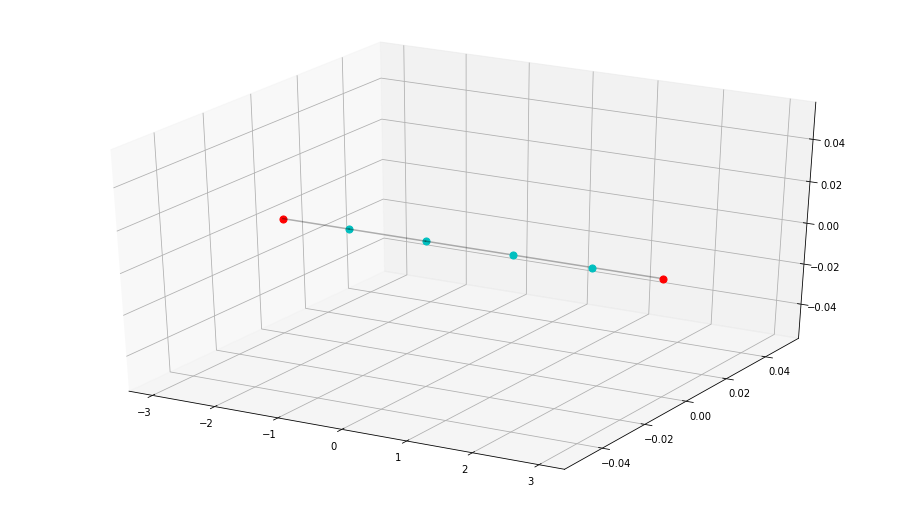

22 {'2-3': 1.0631467, '1-4': 1.1606303, '0-2': 1.2037292, '0-1': 1.3672276}


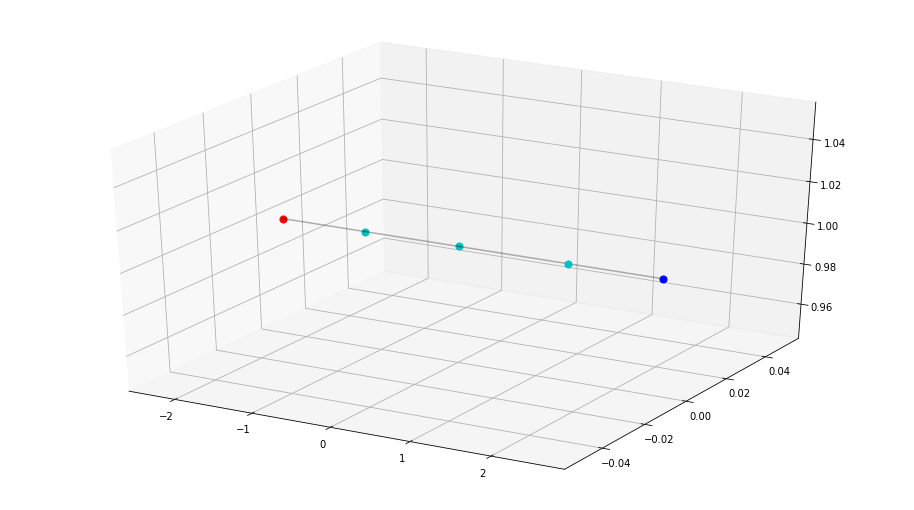

23 {'1-4': 1.1082135, '3-5': 1.0633515, '0-1': 1.2077752, '2-3': 1.2040244, '1-2': 1.4451034}


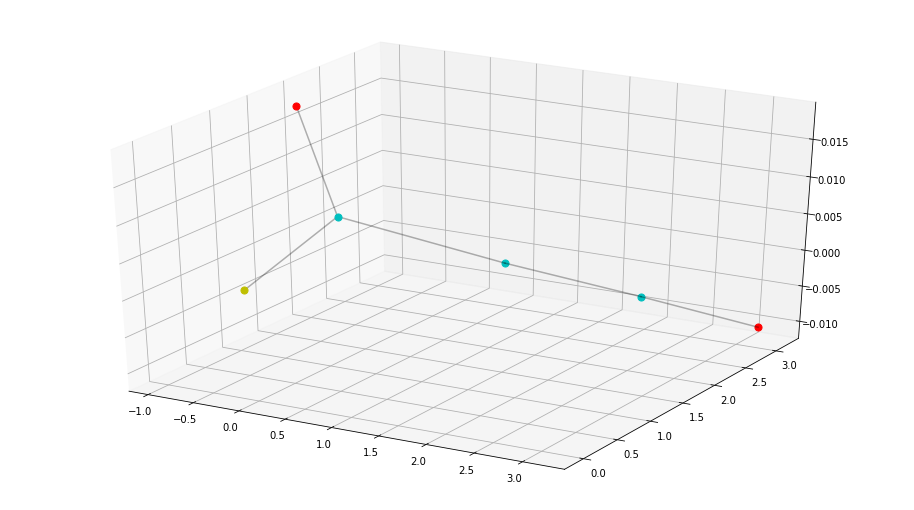

24 {'1-4': 1.1043504, '0-1': 1.2001514, '2-3': 1.1565013, '1-2': 1.4698504}


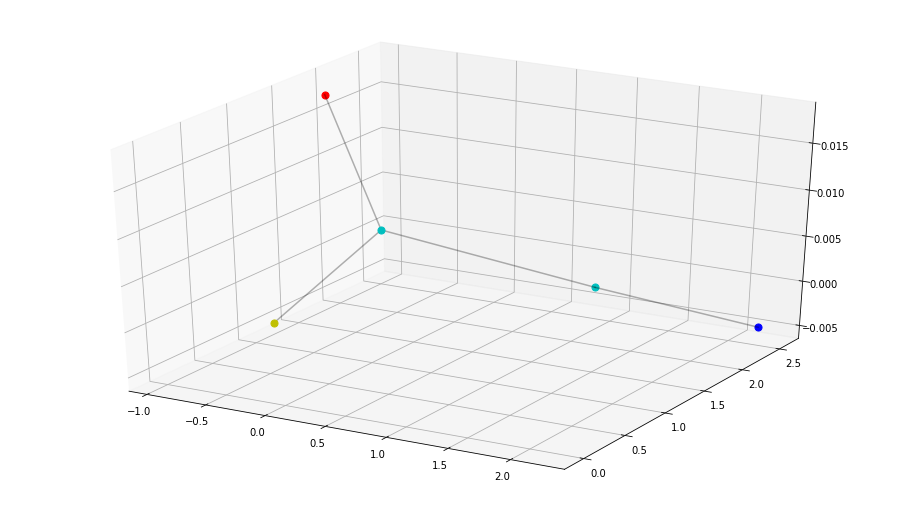

25 {'1-4': 1.1098707, '2-5': 1.1098714, '0-1': 1.2024659, '2-3': 1.2024662, '1-2': 1.5258582}


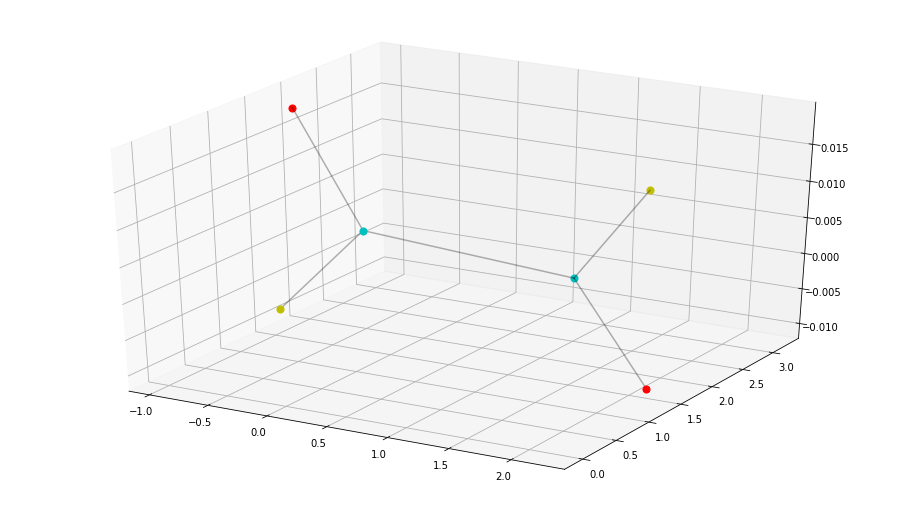

26 {'0-4': 1.0958426, '0-5': 1.0958425, '0-6': 1.0958425, '3-7': 1.0958426, '3-8': 1.0958425, '3-9': 1.0958426, '1-2': 1.2035867, '0-3': 4.1159773}


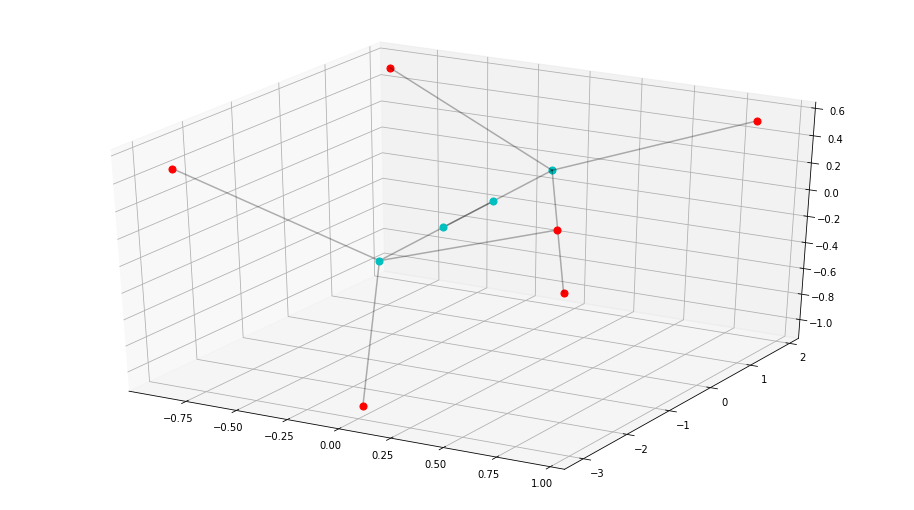

27 {'0-4': 1.0932153, '0-5': 1.0932149, '0-6': 1.0939337, '1-7': 1.0973413, '1-8': 1.0973492, '3-9': 1.0615737, '2-3': 1.2021074, '1-2': 1.4584844, '0-1': 1.539703}


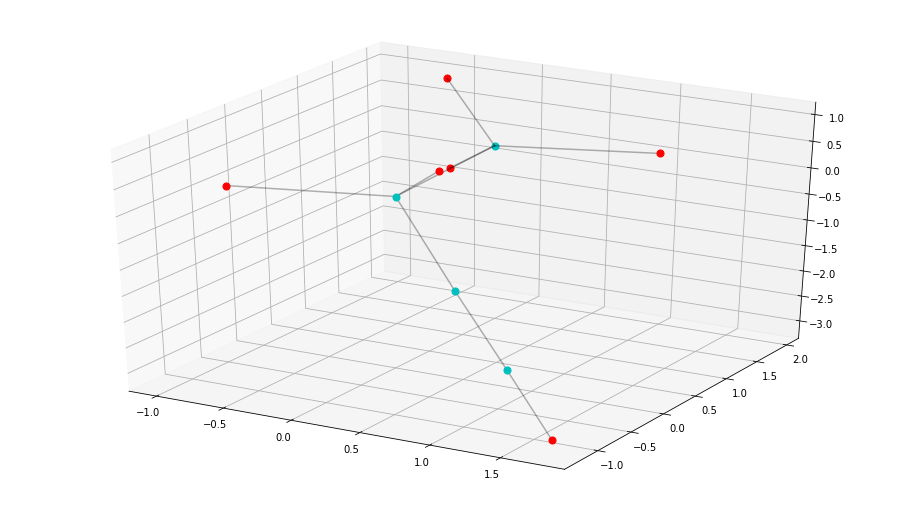

28 {'0-4': 1.092577, '0-5': 1.0925776, '0-6': 1.0928199, '1-7': 1.0954725, '1-8': 1.0955243, '2-3': 1.155553, '1-2': 1.4622567, '0-1': 1.5386268}


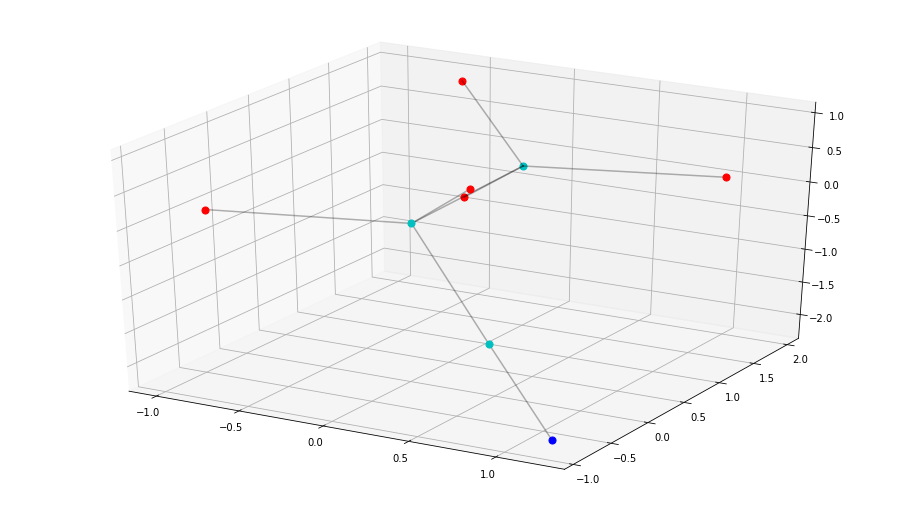

29 {'0-4': 1.0149693, '0-5': 1.0152766, '1-6': 1.1028463, '1-7': 1.0960926, '2-3': 1.1549464, '0-1': 1.4635935, '1-2': 1.467535}


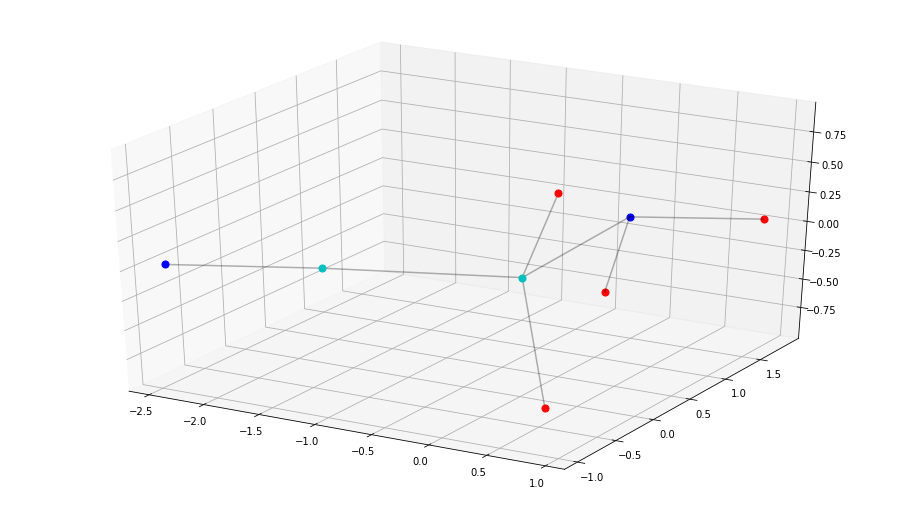

30 {'0-4': 0.9625654, '1-5': 1.1019915, '1-6': 1.1019897, '3-7': 1.0620176, '2-3': 1.2008446, '0-1': 1.4217707, '1-2': 1.457743}


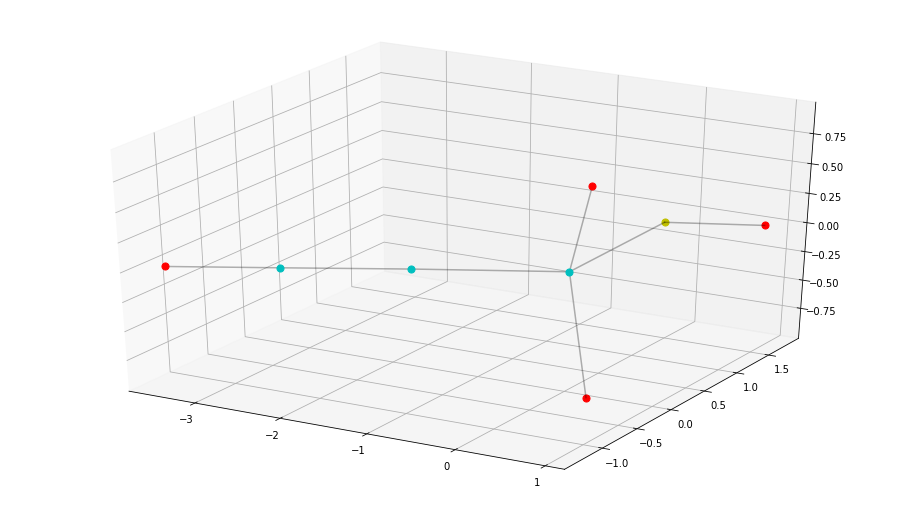

31 {'0-4': 0.96263564, '1-5': 1.1008513, '1-6': 1.1008455, '2-3': 1.1544249, '0-1': 1.4119812, '1-2': 1.466905}


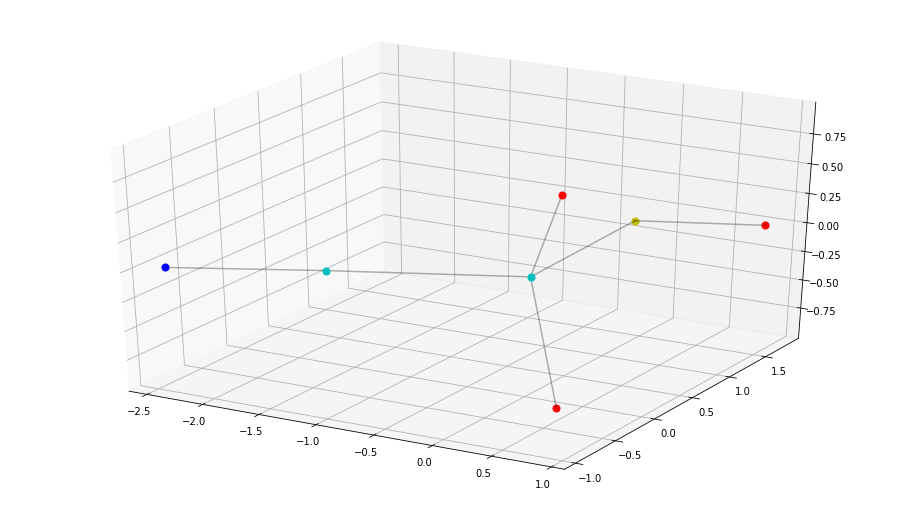

32 {'0-4': 1.0941598, '0-5': 1.0929928, '0-6': 1.095299, '1-7': 1.0996531, '1-8': 1.0934027, '2-9': 1.1169751, '2-3': 1.2035172, '1-2': 1.5118835, '0-1': 1.536339}


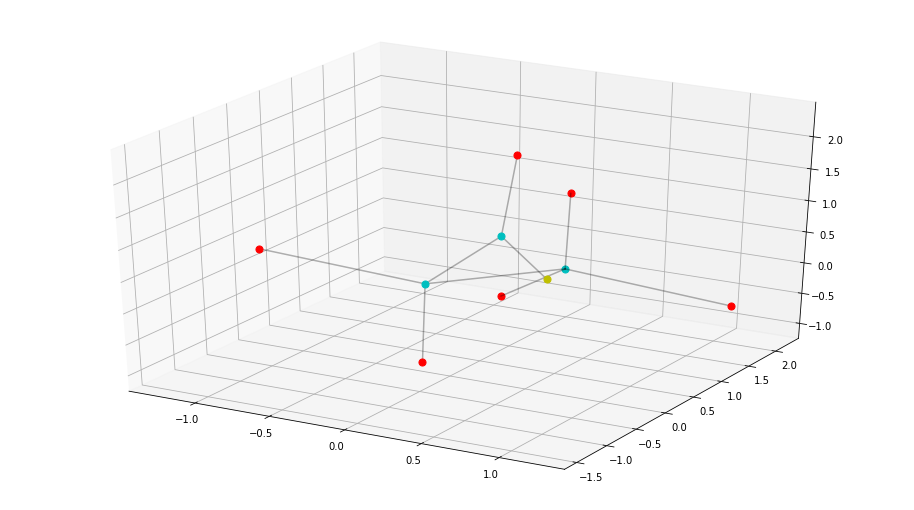

33 {'0-4': 1.0954512, '0-5': 1.095453, '0-6': 1.0905383, '1-7': 1.0068978, '2-8': 1.1084296, '2-3': 1.2125307, '1-2': 1.3597577, '0-1': 1.450853}


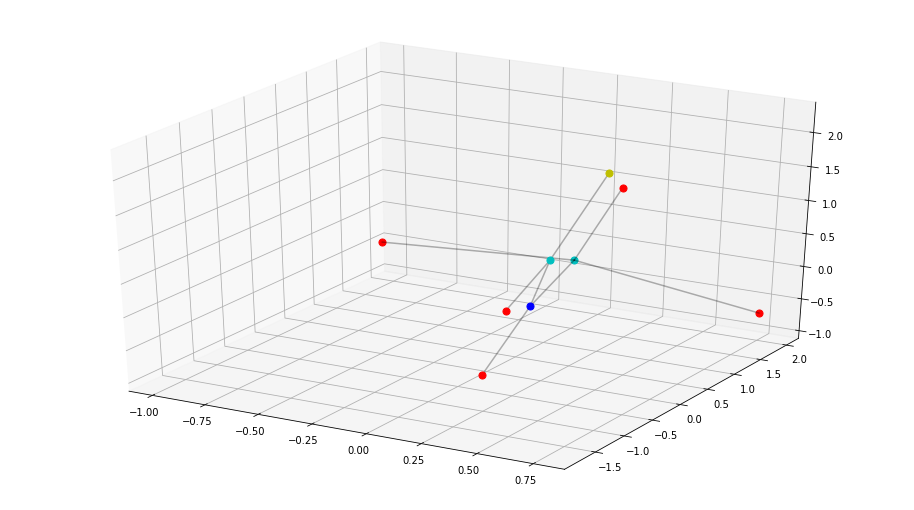

34 {'0-4': 1.0929493, '0-5': 1.096106, '0-6': 1.0929453, '2-7': 1.1086411, '1-2': 1.3456874, '2-3': 1.193119, '0-3': 3.4942555}


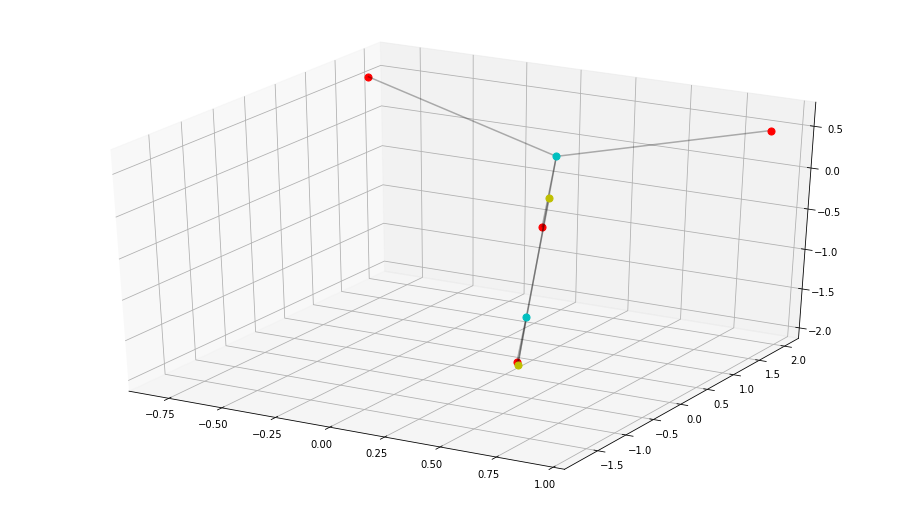

35 {'0-4': 0.96229935, '1-5': 1.0989563, '1-6': 1.0979522, '2-7': 1.1153755, '2-3': 1.2022465, '0-1': 1.4117267, '1-2': 1.523941}


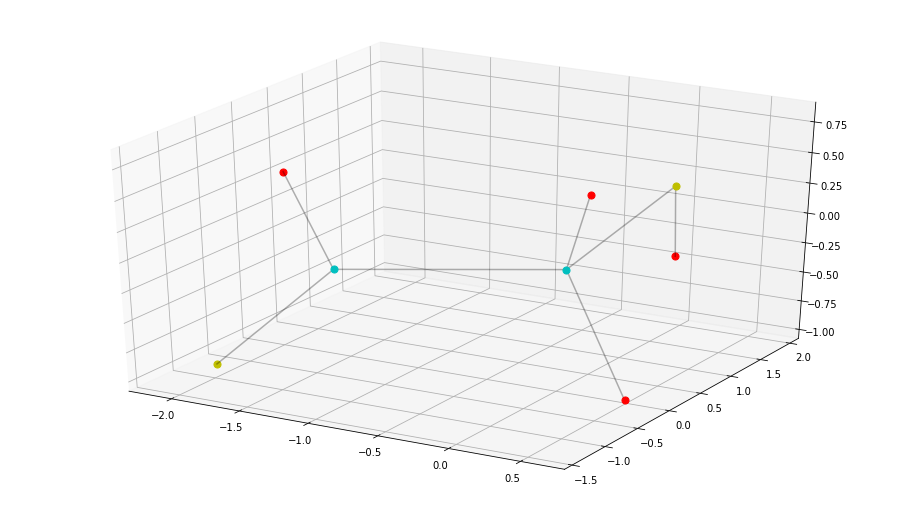

36 {'0-4': 1.0958763, '0-5': 1.095883, '0-6': 1.0946254, '1-7': 1.0981843, '1-8': 1.0981821, '2-9': 1.0981841, '2-10': 1.098182, '3-11': 1.0958828, '3-12': 1.0958765, '3-13': 1.0946256, '0-1': 1.530597, '2-3': 1.5305972, '1-2': 1.5327024}


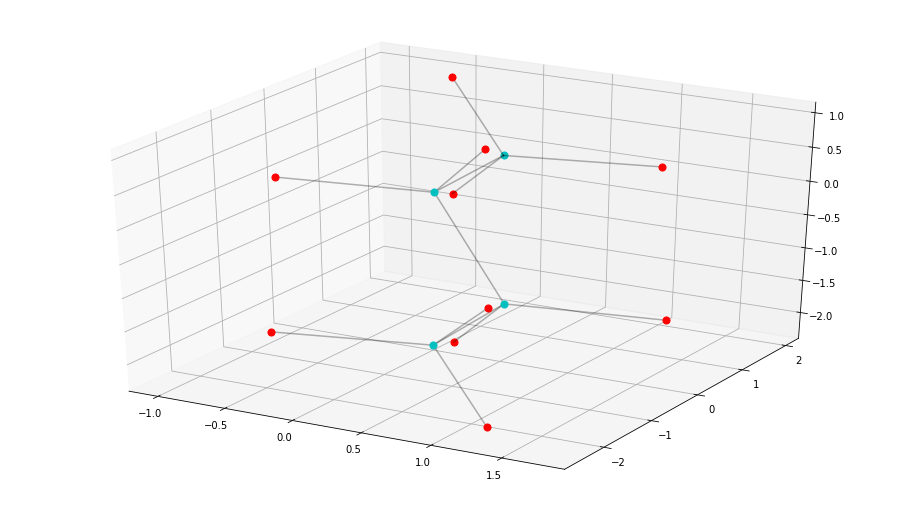

37 {'0-4': 1.093847, '0-5': 1.0957913, '0-6': 1.0957901, '1-7': 1.0962385, '1-8': 1.0962404, '2-9': 1.1030562, '2-10': 1.1030494, '3-11': 0.96140325, '2-3': 1.4199315, '1-2': 1.5225683, '0-1': 1.5301083}


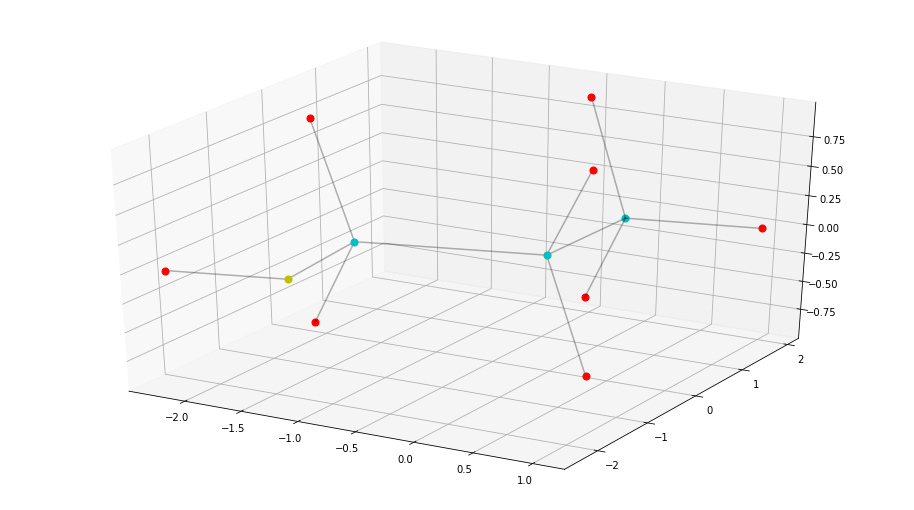

38 {'0-4': 1.0936913, '0-5': 1.0941491, '0-6': 1.0936887, '1-7': 1.1040932, '1-8': 1.1040952, '3-9': 1.102307, '3-10': 1.1023071, '3-11': 1.0929253, '2-3': 1.4054817, '1-2': 1.4118962, '0-1': 1.5192288}


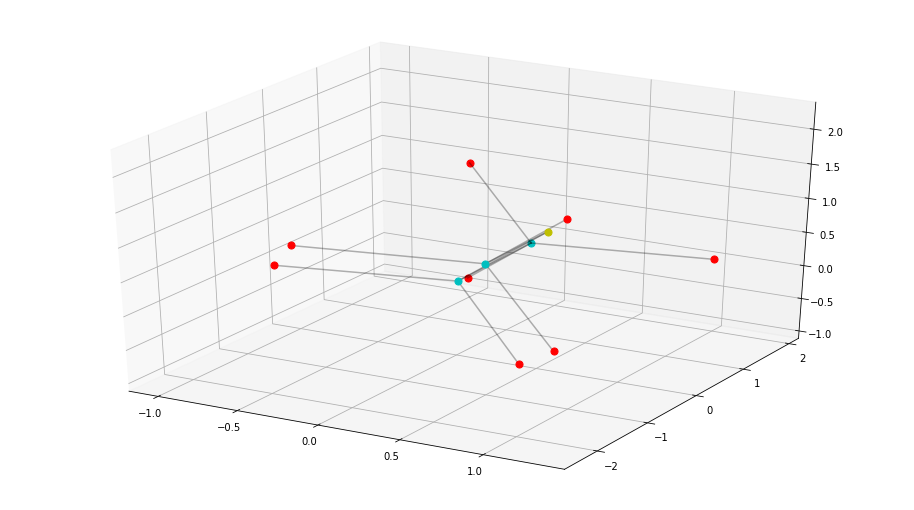

39 {'0-4': 0.962272, '1-5': 1.0995784, '1-6': 1.0956647, '2-7': 1.0956643, '2-8': 1.0995798, '3-9': 0.9622733, '0-1': 1.4220824, '2-3': 1.4220779, '1-2': 1.527501}


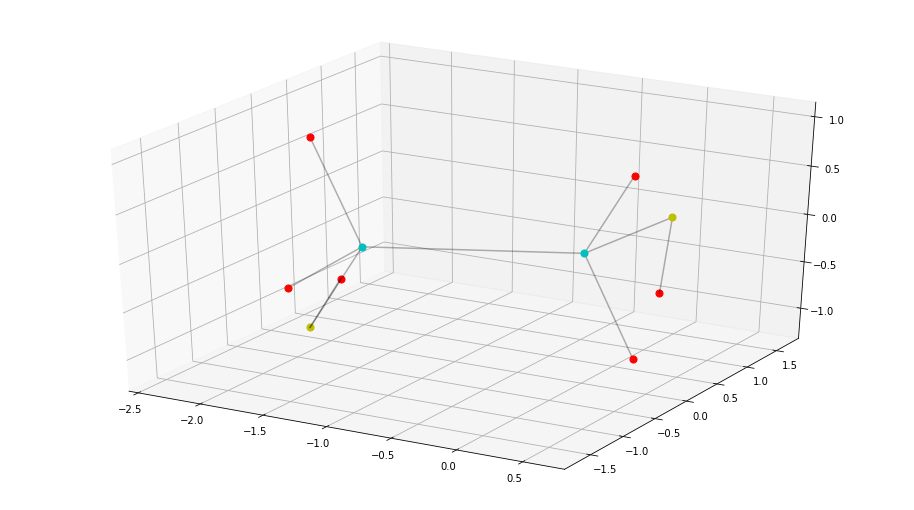

40 {'0-4': 1.0956131, '0-5': 1.0959258, '0-6': 1.0959272, '1-7': 1.0870847, '2-8': 1.0845256, '2-9': 1.0853461, '3-10': 1.0853462, '3-11': 1.0845256, '1-3': 1.5077828, '1-2': 1.5077833, '0-2': 2.6205587}


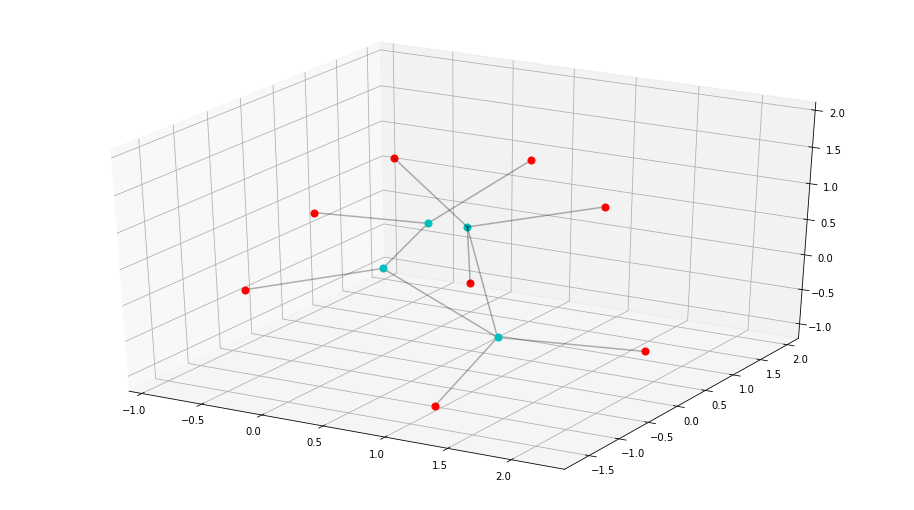

Error: 41
41 {'0-4': 1.093521, '0-5': 1.0954491, '0-6': 1.094991, '1-7': 1.0917422, '2-8': 1.089354, '2-9': 1.0897266, '2-3': 1.4287385, '0-1': 1.506291}


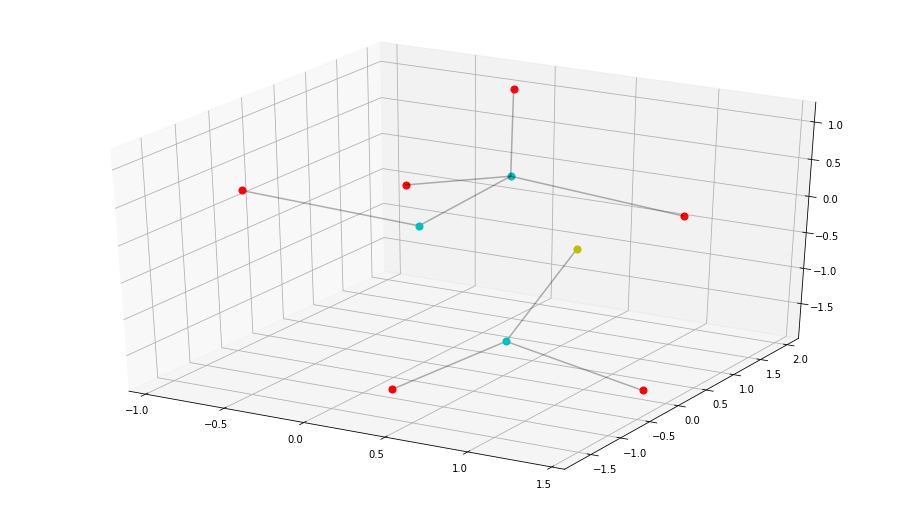

Error: 42
42 {'0-4': 1.1043853, '0-5': 1.0948256, '0-6': 1.0948255, '2-7': 1.0863492, '2-8': 1.0893939, '3-9': 1.0893939, '3-10': 1.0863492, '0-1': 1.4550664, '1-2': 1.4579887}


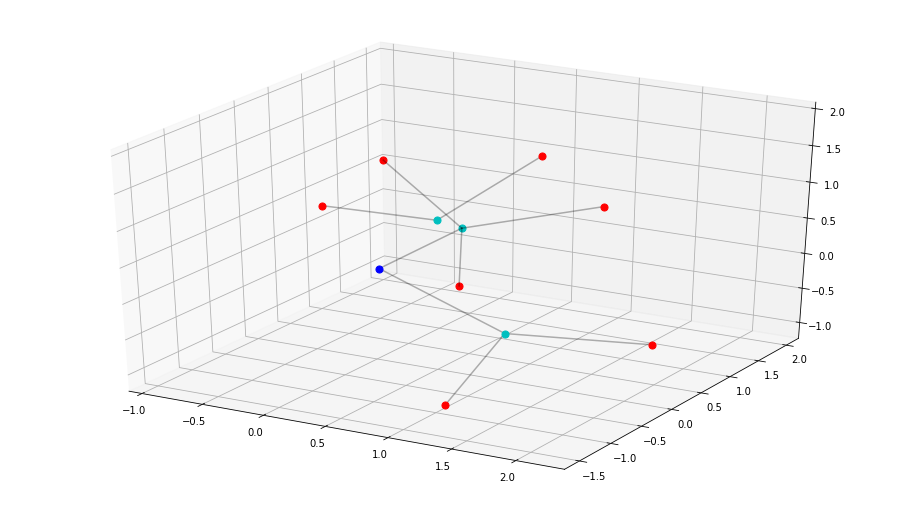

43 {'0-4': 0.96249306, '1-5': 1.0849155, '2-6': 1.0846615, '2-7': 1.0859432, '3-8': 1.0859442, '3-9': 1.0846614, '0-1': 1.3986834, '1-3': 1.5019917, '1-2': 1.5019944, '2-3': 1.5234518}


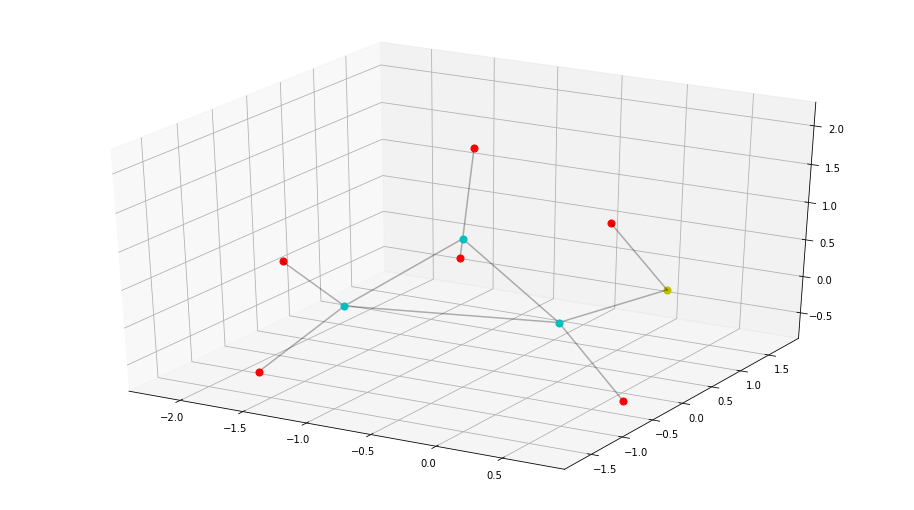

44 {'0-4': 1.0942191, '0-5': 1.0928497, '1-6': 1.0942191, '1-7': 1.0928501, '2-8': 1.0928497, '2-9': 1.0942192, '3-10': 1.0928499, '3-11': 1.0942189, '0-1': 1.5537326, '2-3': 1.553733}


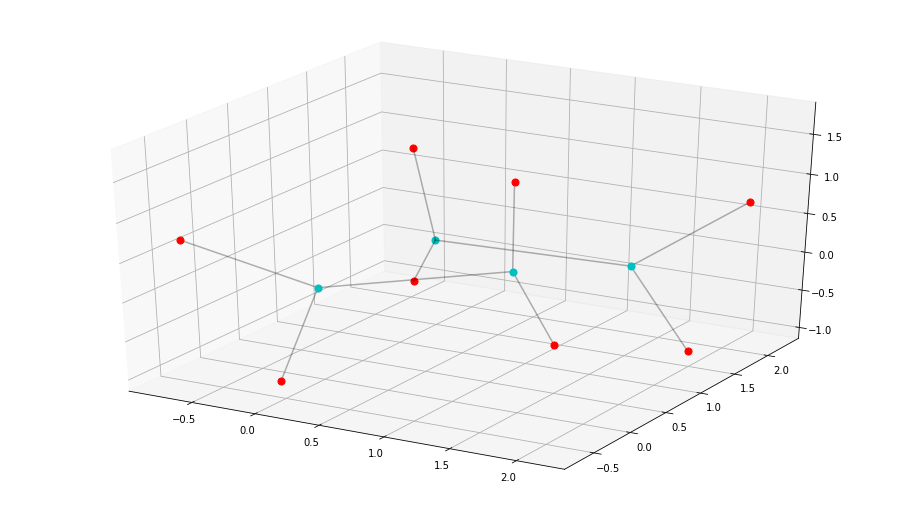

45 {'0-4': 1.0910323, '0-5': 1.0910321, '1-6': 1.0973303, '1-7': 1.0973293, '3-8': 1.0973293, '3-9': 1.0973302, '2-3': 1.4428551, '0-1': 1.5428085}


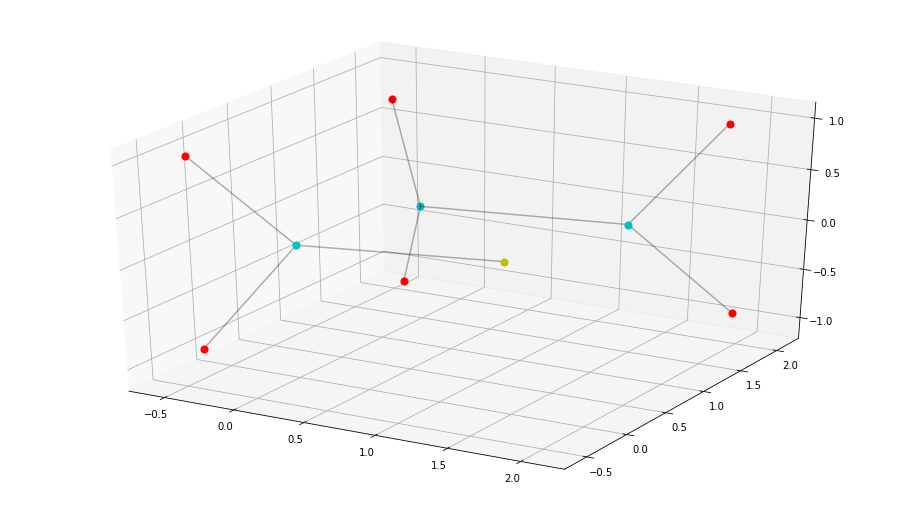

46 {'0-5': 1.0950534, '0-6': 1.0946212, '0-7': 1.0917827, '2-8': 1.0969467, '2-9': 1.0912048, '2-10': 1.0969399, '4-11': 0.9626868, '1-3': 1.2784543, '3-4': 1.4076201, '1-2': 1.5013798, '0-1': 1.505876}


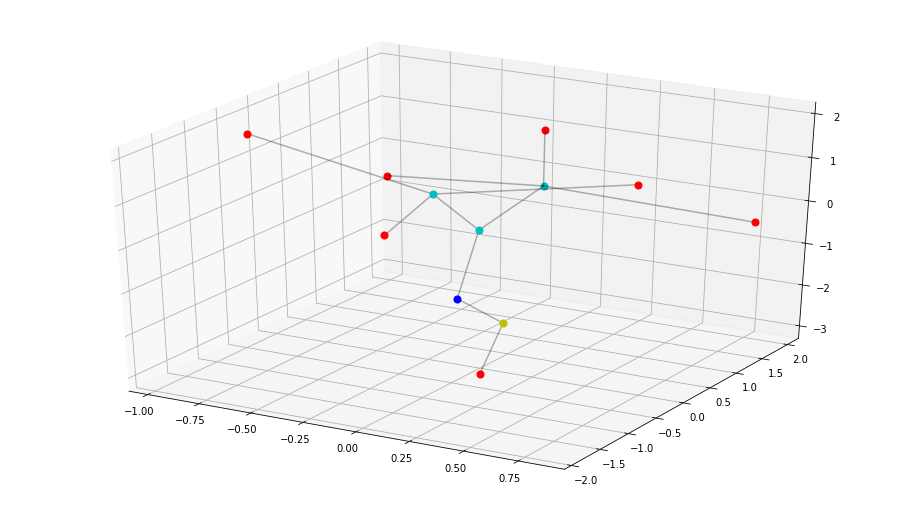

47 {'0-5': 1.0044476, '1-6': 1.0781095, '2-7': 1.0791688, '3-8': 1.0791689, '4-9': 1.0781094, '0-4': 1.3720269, '0-1': 1.3720276, '1-2': 1.3754011, '3-4': 1.3754007, '2-3': 1.4235445}


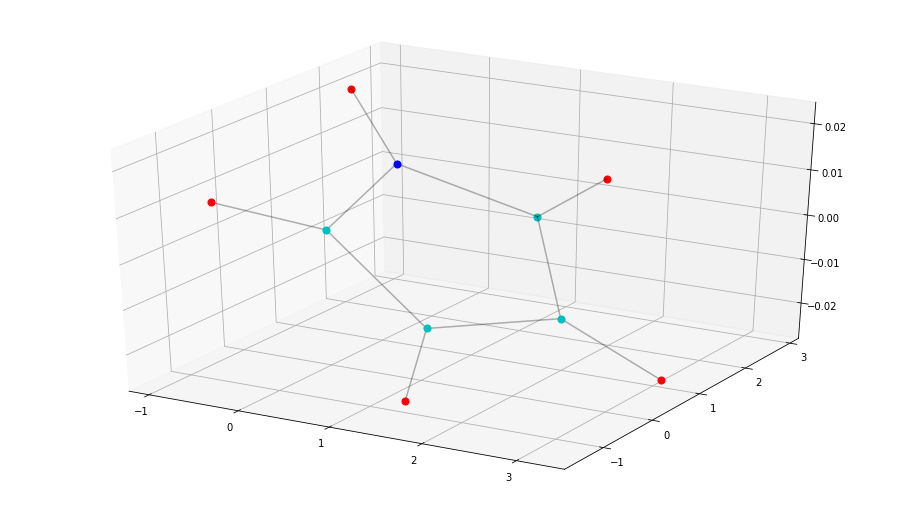

48 {'0-5': 1.0059822, '1-6': 1.0771571, '2-7': 1.0793447, '4-8': 1.0798053, '3-4': 1.3125722, '0-4': 1.3638477, '1-2': 1.3697478, '0-3': 2.215157}


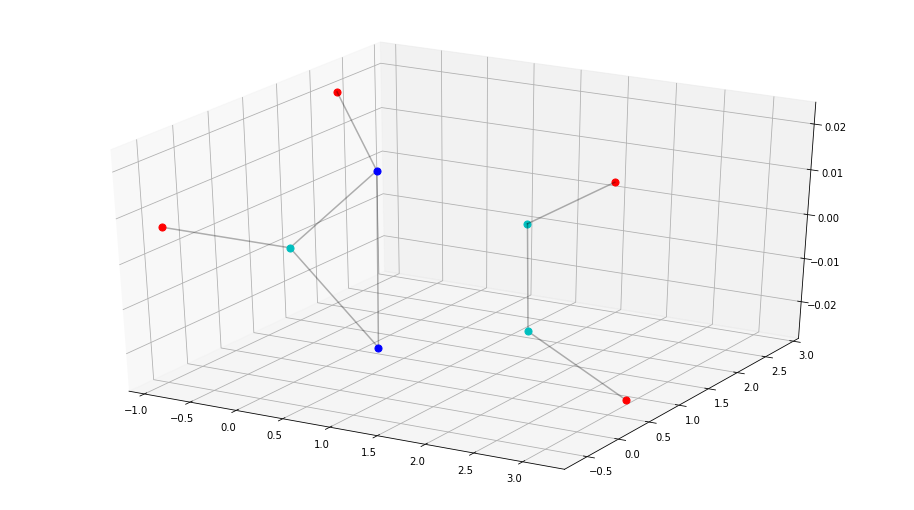

49 {'1-5': 1.0773749, '2-6': 1.0785633, '3-7': 1.0785633, '4-8': 1.0773747, '0-1': 1.3593227, '1-2': 1.3578994, '3-4': 1.3578993, '2-3': 1.4346495, '2-4': 2.230815}


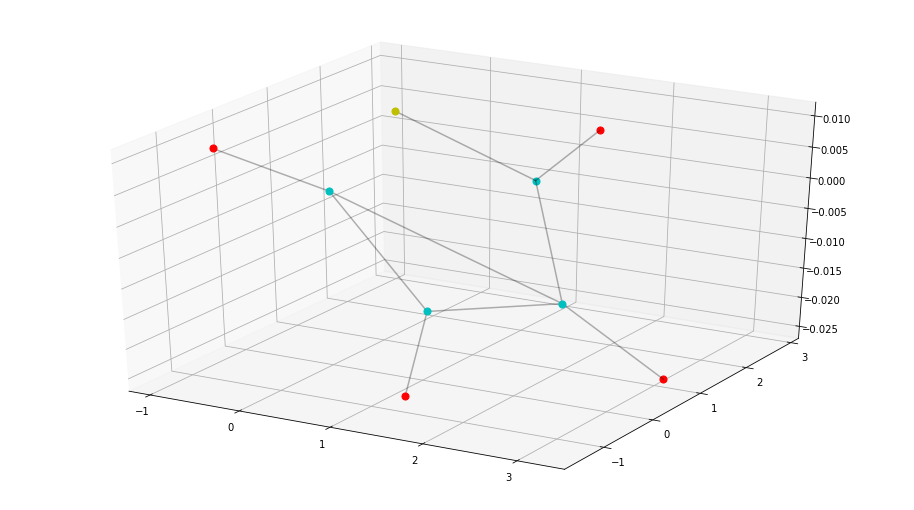

In [34]:
distance_info = pd.read_pickle('../../pkl/distance_info.pkl')
for i in range(50):
    edge_dict, error = edge(i,distance_info)
    print(i, edge_dict)
    print_3Dstructure(edge_dict,i)

In [40]:
valence_info

{'C': 4, 'H': 1, 'N': 3, 'O': 2, 'F': 1}

In [12]:
valence_info

{'C': 4, 'H': 1, 'N': 3, 'O': 2, 'F': 1}

In [19]:
atom = list(number_info['dsgdb9nsd_000001'].keys())

In [26]:
number_info['dsgdb9nsd_000001']

{'C': 1, 'H': 4, 'N': 0, 'O': 0, 'F': 0}

In [10]:
atom = number_info['dsgdb9nsd_000001'].values()

In [11]:
atom

dict_values([1, 4, 0, 0, 0])

In [31]:
name_info['dsgdb9nsd_000001']

{0: 'C', 1: 'H', 2: 'H', 3: 'H', 4: 'H'}